!conda install matplotlib numpy imageio scikit-image

In [2]:

import matplotlib.pyplot as plt
import numpy as np

import imageio
%matplotlib inline

In [3]:
img = imageio.imread('home_task_01.jpg')
img = img.astype(np.float32) / 255.

C:\Users\zheludkov\AppData\Local\Temp\ipykernel_4724\3492823619.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('home_task_01.jpg')


In [4]:
print(img.shape)

(933, 700, 3)


### Вывод оригинального изображения

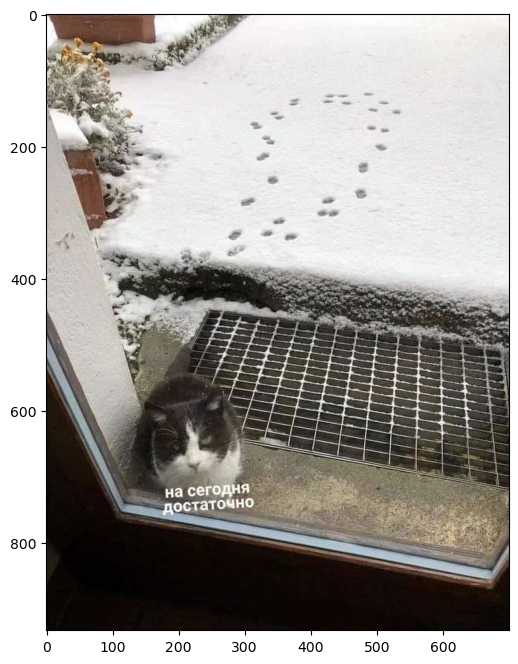

In [5]:
plt.figure(figsize=(8, 8))
plt.imshow(img)

### Вывод изображения в градациях серого

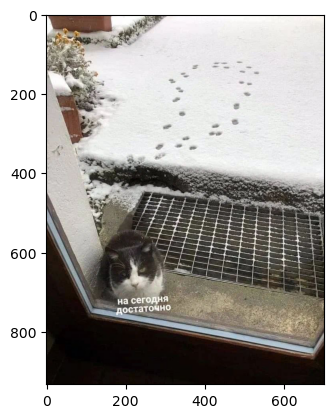

In [6]:
plt.imshow(img, cmap='gray')

### Вывод части изображения

In [7]:
img_crop = img[100:300, 200:500]
print(img_crop.shape)

(200, 300, 3)


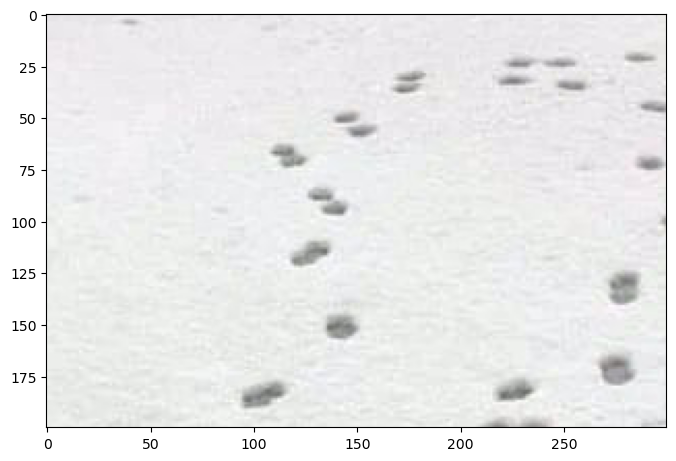

In [8]:
plt.figure(figsize=(8, 8))
plt.imshow(img_crop, cmap='gray')

### Вывод линейного уменьшения яркости

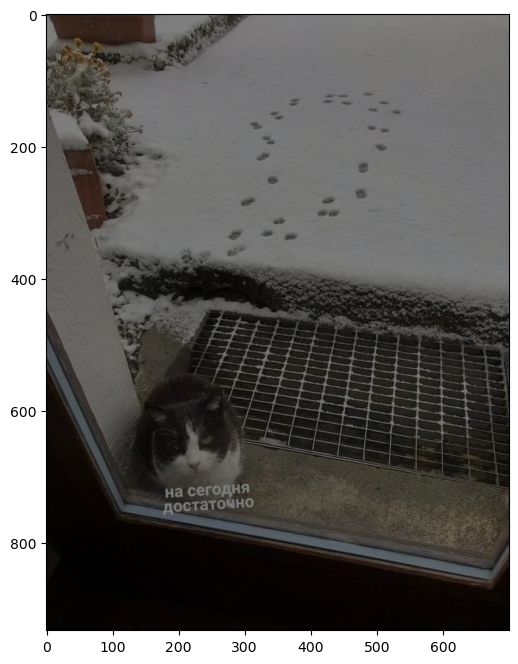

In [9]:
plt.figure(figsize=(8, 8))
plt.imshow(img/2)

### Вывод линейного увеличения яркости

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


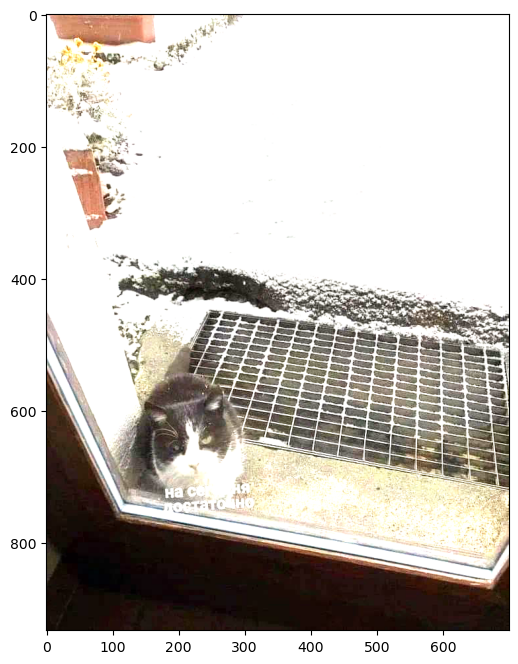

In [10]:
plt.figure(figsize=(8, 8))
plt.imshow(img*2)

### Вывод нелинейного уменьшения яркости

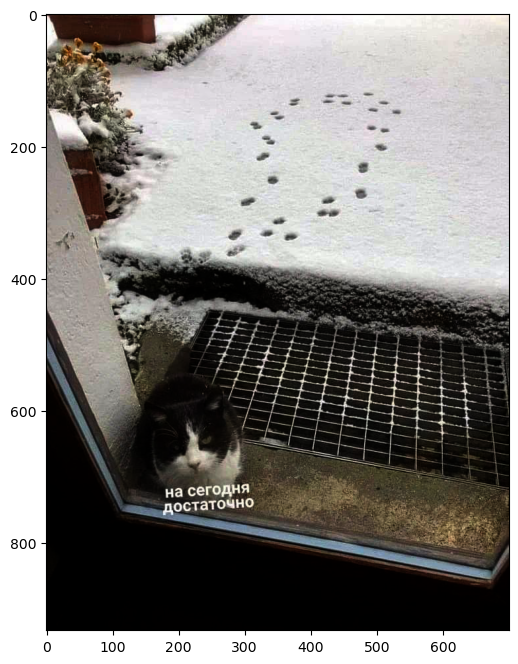

In [11]:
plt.figure(figsize=(8, 8))
plt.imshow(img**2)

### Вывод нелинейного увеличения яркости

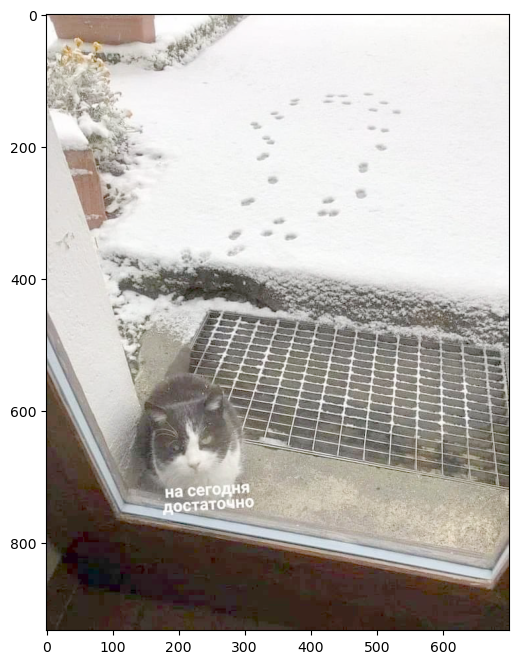

In [12]:
plt.figure(figsize=(8, 8))
plt.imshow(img**0.5)

### Цветовое пространство HSV

In [13]:
from skimage.color import rgb2hsv, hsv2rgb

In [14]:
img_hsv = rgb2hsv(img)

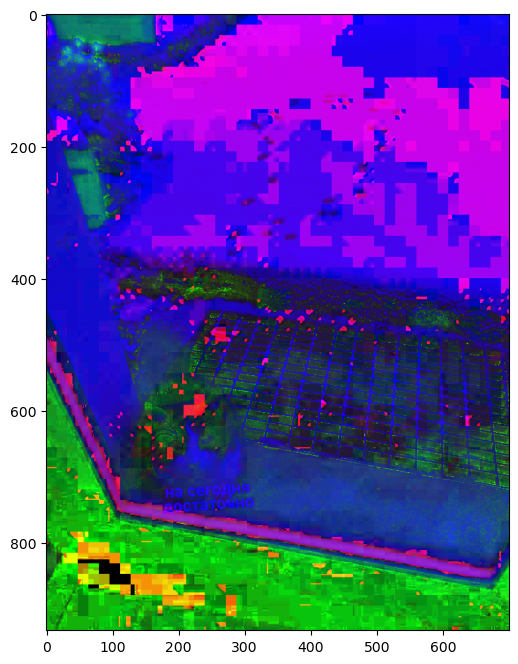

In [15]:
plt.figure(figsize=(8, 8))
plt.imshow(img_hsv)

### Вывод с линейным уменьшением насыщенности

In [16]:
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 1] /= 2
img_new = hsv2rgb(img_hsv_new)

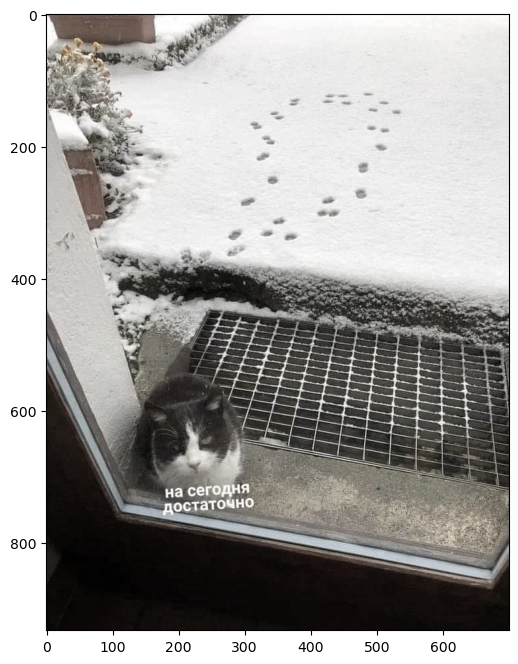

In [17]:
plt.figure(figsize=(8, 8))
plt.imshow(img_new)

### Вывод с линейным увеличением насыщенности

In [18]:
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 1] *= 2
img_new = hsv2rgb(img_hsv_new)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


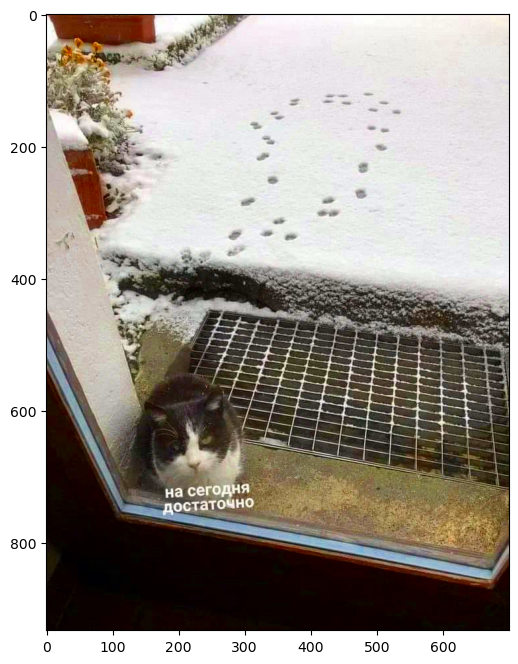

In [19]:
plt.figure(figsize=(8, 8))
plt.imshow(img_new)

### Вывод с изменением тона

In [20]:
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 0] /= 2
img_new = hsv2rgb(img_hsv_new)

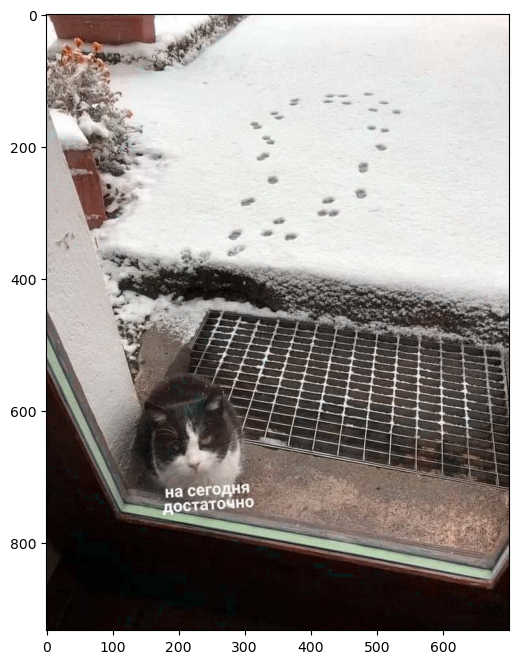

In [21]:
plt.figure(figsize=(8, 8))
plt.imshow(img_new)

### Вывод с бинаризацией по порогу

In [25]:
threshold = 0.45 # порог бинаризации
img_bw = np.mean(img, axis=2)
img_bin = (img_bw > threshold).astype(np.uint8)

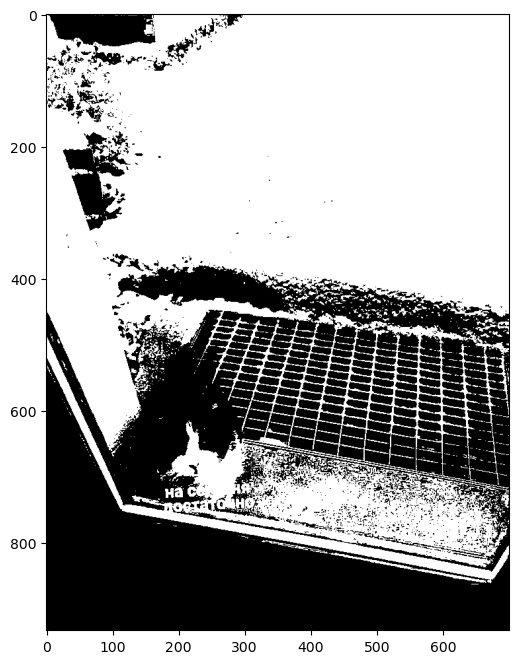

In [26]:
plt.figure(figsize=(8, 8))
plt.imshow(img_bin*255, cmap='gray')

### Вывод с фильтрацией цветного изображения по Гауссу

In [27]:
win_size = (11, 11)
sigma = 3
w = np.zeros(win_size, dtype=np.float32)
for i in range(w.shape[0]):
    for j in range(w.shape[1]):
        w[i,j] = np.exp(-(i-w.shape[0]//2)**2 / sigma**2 / 2 
                            -(j-w.shape[1]//2)**2 / sigma**2 / 2)
w = w / np.sum(w)

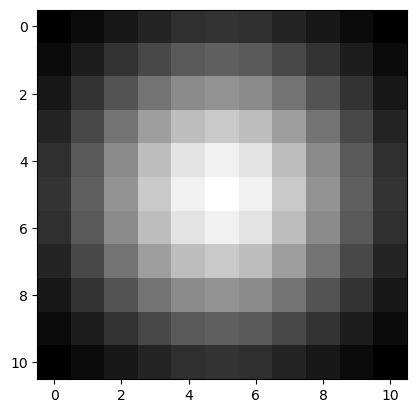

In [28]:
plt.imshow(w, cmap='gray')

In [29]:
import scipy.signal

In [30]:
out_img = []
for c in range(3):
    out_img.append(scipy.signal.correlate2d(img[:,:,c], w, mode='valid'))
out_img = np.stack(out_img, axis=2)

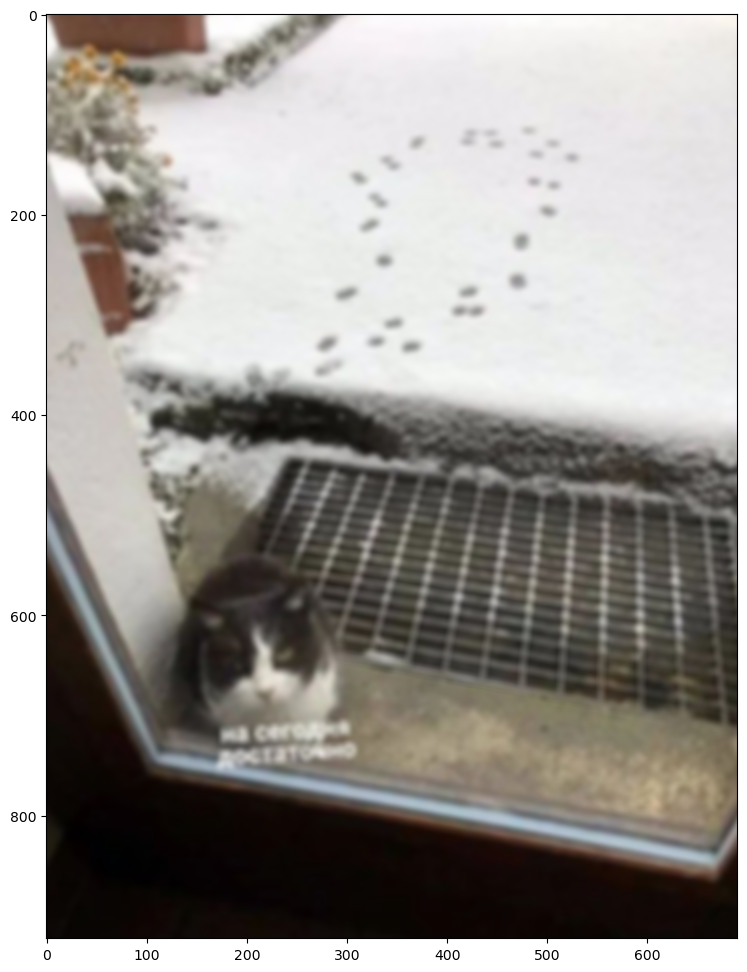

In [31]:
plt.figure(figsize=(12, 12))
plt.imshow(out_img)

### Вывод с выделением границ

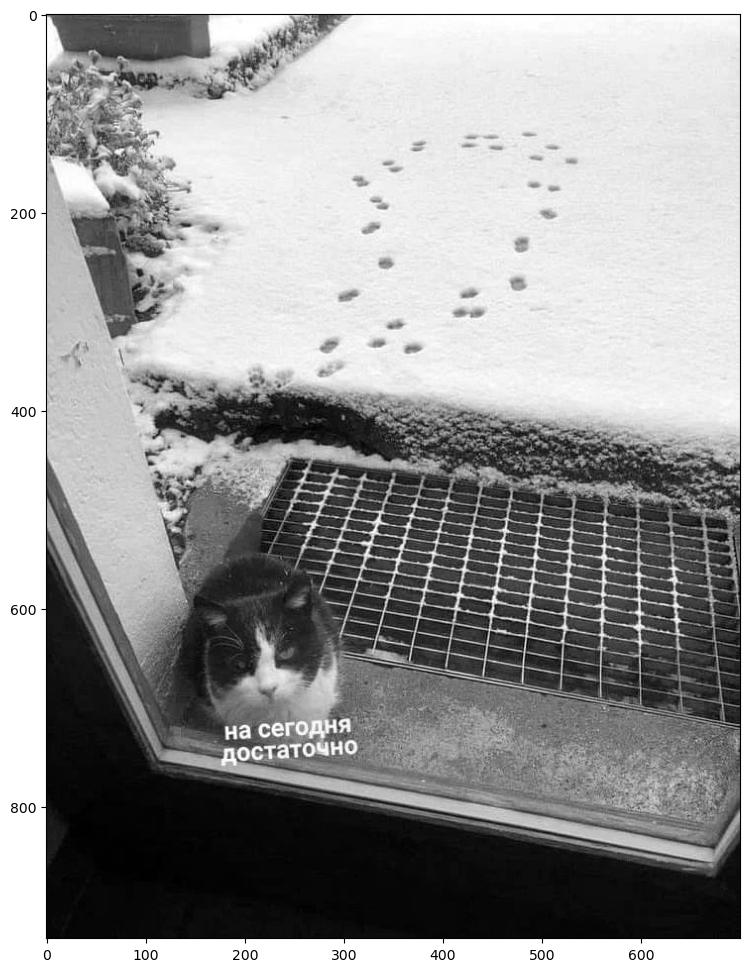

In [32]:
img_bw = np.mean(img, axis=2)
plt.figure(figsize=(12, 12))
plt.imshow(img_bw, cmap='gray')

In [33]:
a = np.array([[-1, -1, -1],
              [0,  0,  0],
              [1,  1,  1]])

b = np.array([[-1, 0, 1],
              [-1, 0, 1],
              [-1, 0, 1]])

In [34]:
out_img = np.abs(scipy.signal.correlate2d(img_bw, a, mode='valid')) + \
np.abs(scipy.signal.correlate2d(img_bw, b, mode='valid'))

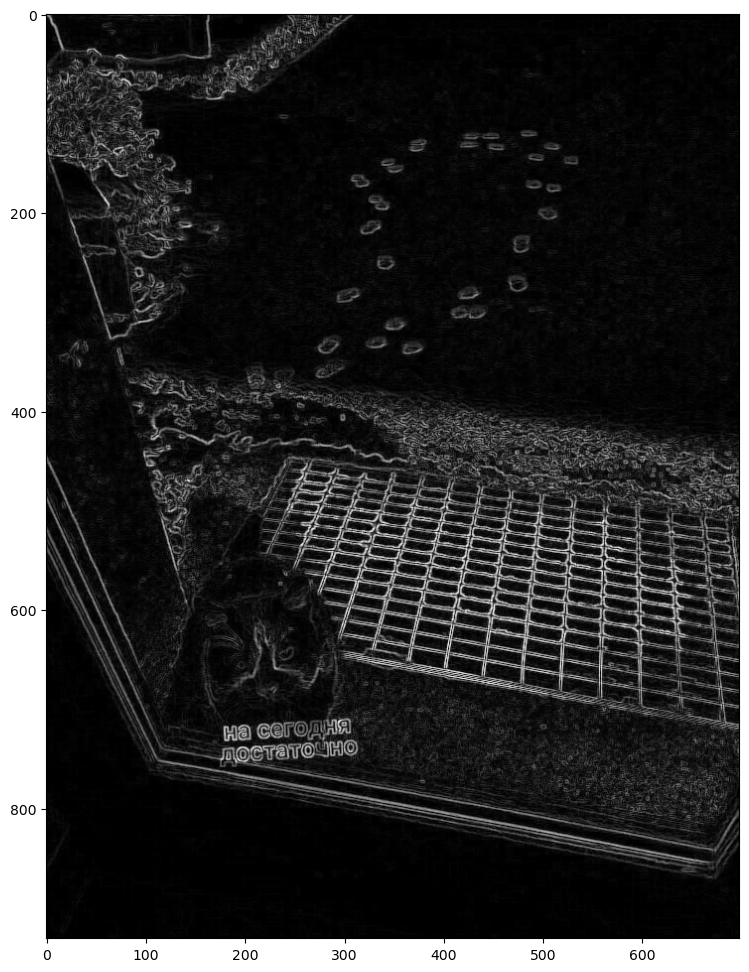

In [35]:
plt.figure(figsize=(12, 12))
plt.imshow(np.abs(out_img), cmap='gray')